In [93]:
import random
import matplotlib.pyplot as plt

from os.path import join

from mnist_dataloader import *

In [94]:
#
# Set file paths based on added MNIST Datasets
#
input_path = '../data/'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte')

In [95]:
#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

In [96]:
#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

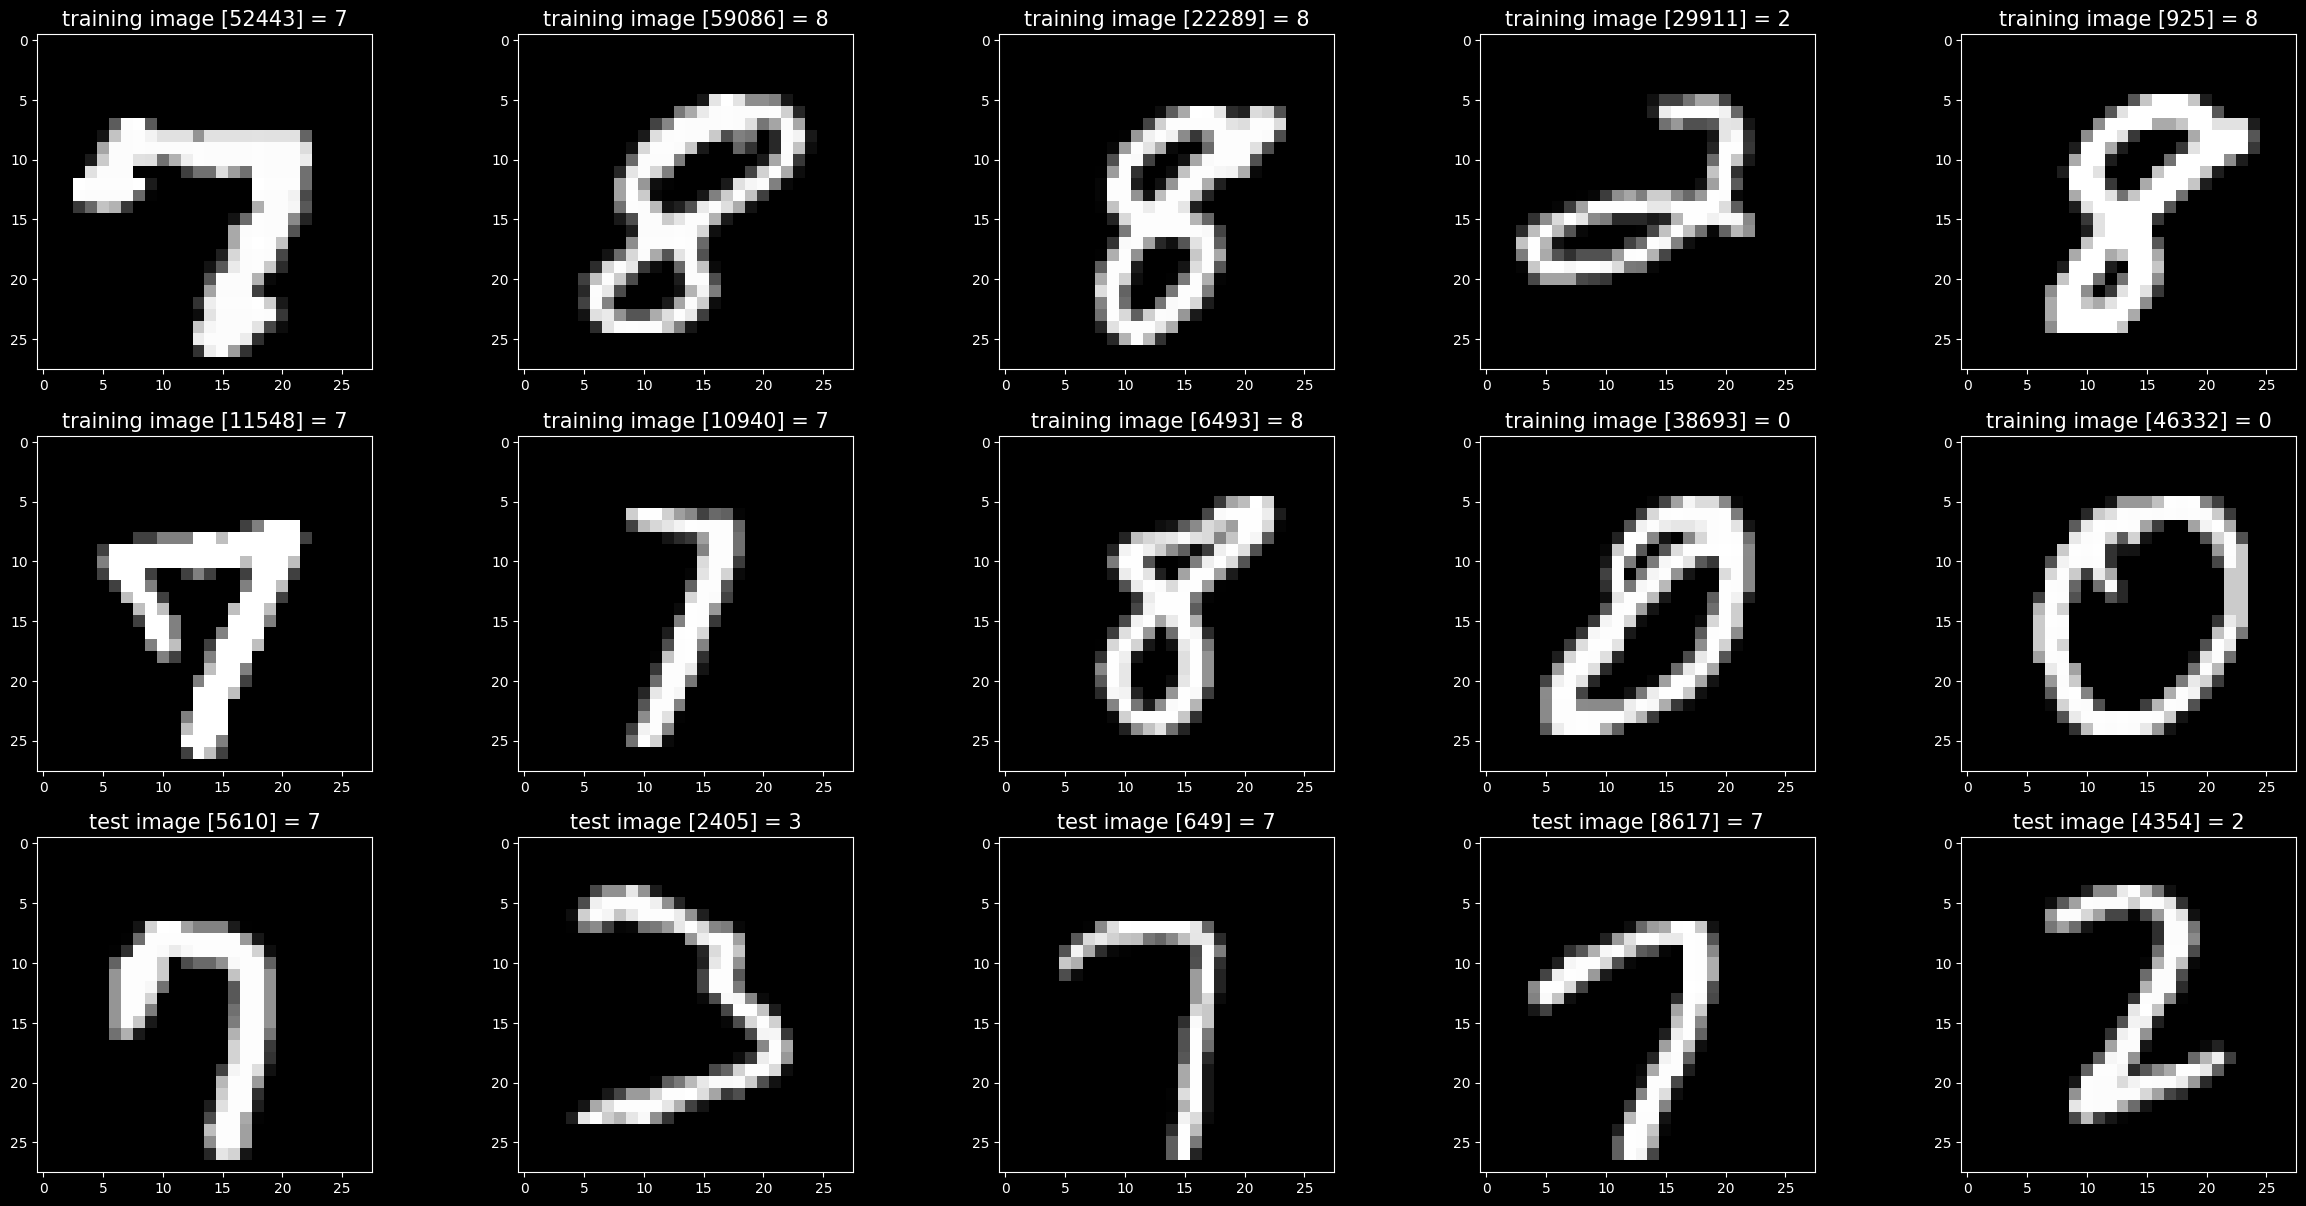

In [97]:
#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [98]:
import numpy as np
import pandas as pd

In [99]:
x_test, x_train = np.array(x_test), np.array(x_train)
y_test, y_train = np.array(y_test), np.array(y_train)

In [100]:
y_test[0], x_test[0].shape

(np.uint8(7), (28, 28))

In [101]:
pd.DataFrame(y_train).value_counts()

0
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [102]:
pd.DataFrame(y_test).value_counts()

0
1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: count, dtype: int64

In [103]:
x_test.dtype, x_train.dtype

(dtype('uint8'), dtype('uint8'))

In [104]:
np.min(x_test), np.max(x_test)

(np.uint8(0), np.uint8(255))

In [105]:
np.min(x_train), np.max(x_train)

(np.uint8(0), np.uint8(255))

In [106]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [107]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [108]:
x_test, x_train = x_test / 255.0, x_train / 255.0

In [109]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [110]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential

In [111]:
model = Sequential([
    layers.Flatten(input_shape=(28, 28)),

    layers.Dense(1568, activation='relu'),
    layers.Dense(784, activation='relu'),
    layers.Dense(392, activation='relu'),

    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [112]:
history = model.fit(x_train, y_train)
model.save('model.keras')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 110s 56ms/step - accuracy: 0.9025 - loss: 0.3091


In [113]:
y_pred_prob = model.predict(x_test)

y_pred = np.argmax(y_pred_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print(f'accuracy = {accuracy:.4f}')

accuracy = 0.9705


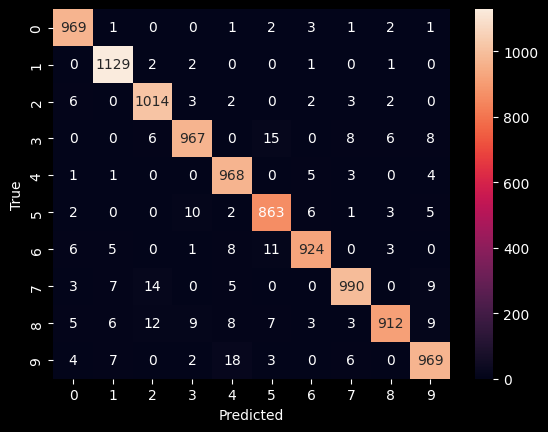

In [115]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


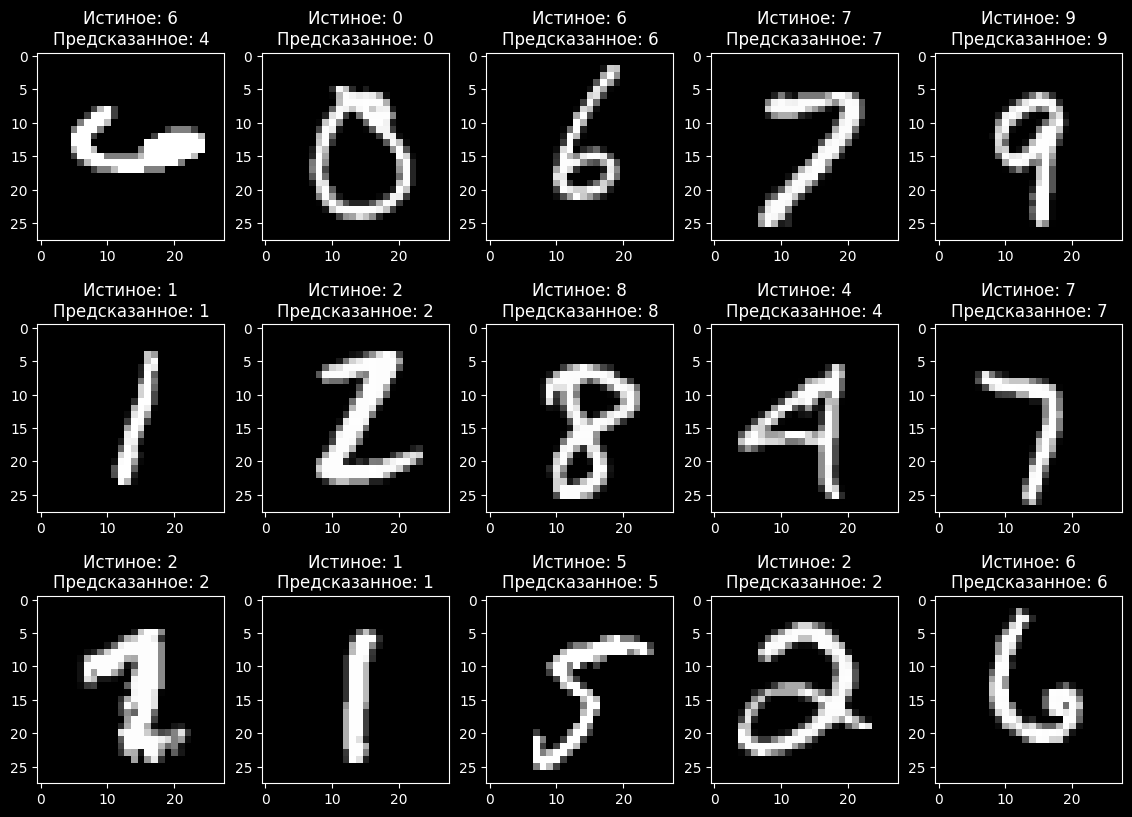

In [117]:
cols = 5
rows = 3

plt.figure(figsize=(14, 10))
   
for _ in range(cols * rows):   
    idx = random.randint(0, x_test.shape[0])

    image = x_test[idx]   
    true_label = y_test[idx]
    pred_label = np.argmax(model.predict(image.reshape(1, 28, 28)))

    plt.subplot(rows, cols, _ + 1)    

    plt.imshow(image, cmap=plt.cm.gray)

    plt.title(f'Истиное: {true_label}\nПредсказанное: {pred_label}'); 

plt.show()